## Importation des bibliothèques

In [1]:
#Importation des bibliothèques
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from PIL import Image
from matplotlib import pyplot
from numpy import asarray
from os import listdir

os.listdir est utilisée pour obtenir la liste de tous les fichiers et répertoires dans le répertoire spécifié.
La méthode endswith test si une chaine de caractères se termine par la chaine demandée

## Chargement de la base de données

In [4]:
#Chargement de la base de données
X_train = np.zeros((460, 240, 320)) # X_train 460 lines ou les données de chaque image sont stockées
Y_train = np.zeros((460)) # Y_train Contient les résultats attendus

i = 0

for k in range(1, 45):
    left = r"E:/Projects/Images Classification/MMU-Iris-Database/" + str(k) + "/left"
    right = r"E:/Projects/Images Classification/MMU-Iris-Database/" + str(k) + "/right"
    # Exclure les fichiers dont l'extension est différente de .bmp
    # Boucler sur les images dont l'extension est .bmp et les stocker dans X_train
    for j in listdir(left): 
        if j.endswith('.bmp'):  
            image = np.array(Image.open(left + '/' + j).convert(mode = 'L'))
            X_train[i] = image
            Y_train[i] = k - 1
            i += 1

    for j in listdir(right):
        if j.endswith('.bmp'):
            image = np.array(Image.open(right + '/' + j).convert(mode = 'L'))
            X_train[i] = image
            Y_train[i] = k - 1
            i += 1

pyplot.imshow est utilisé pour afficher les données sous forme d'image
dans cette exemple on va afficher la quarantième image

### Visualiser les données

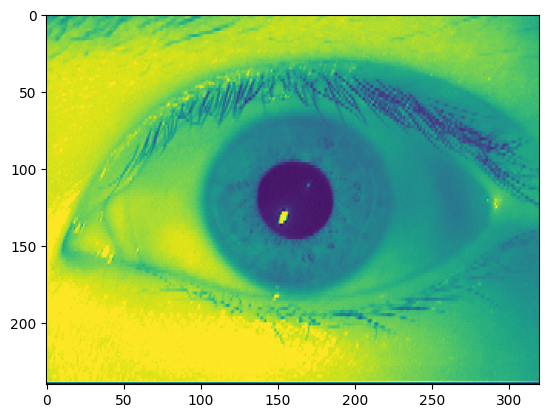

In [5]:
pyplot.imshow(X_train[40].reshape(240,320)) 
pyplot.show()

la fonction conv est utilisée pour convertir les éléments de X_train en float et les éléments de Y_train en int

In [6]:
def conv(x, y): 
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)
  return x, y

def creer_bd(a, b, nbr_classes=46): #Création d'une base de données, le nombre de classe 46 est le nombre de personnes
  b = tf.one_hot(b, depth=nbr_classes)
  return tf.data.Dataset.from_tensor_slices((a, b)) \
    .map(conv) \
    .shuffle(len(b)) \
    .batch(128)

bd = creer_bd(X_train, Y_train)
val_dataset = creer_bd(X_train, Y_train)

units: définie le nombre de neuronnes  
activation : définie la fonction d'activation

## Création d'un modèle de réseaux de neurones

In [7]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(240 * 320,), input_shape=(240, 320)),
    keras.layers.Dense(units=300, activation='relu'),
    keras.layers.Dense(units=210, activation='relu'),
    keras.layers.Dense(units=150, activation='relu'),
    keras.layers.Dense(units=46, activation='sigmoid')
])

print(X_train.shape)

(460, 240, 320)


In [8]:
model.layers

## Entrainement du modèle

step_per_epoch désigne le nombre Total d'étapes (lots d'échantillons) pour le rendement du générateur avant de déclarer une époque terminée et le démarrage de la prochaine époque.

In [9]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    bd.repeat(), 
    epochs=8, 
    steps_per_epoch=160
)

Epoch 1/8


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


160/160 [==============================] - 59s 362ms/step - loss: 6.7936 - accuracy: 0.2024
Epoch 2/8
160/160 [==============================] - 62s 386ms/step - loss: 1.5961 - accuracy: 0.5862
Epoch 3/8
160/160 [==============================] - 64s 402ms/step - loss: 0.5001 - accuracy: 0.8934
Epoch 4/8
160/160 [==============================] - 60s 373ms/step - loss: 0.1089 - accuracy: 0.9930
Epoch 5/8
160/160 [==============================] - 60s 372ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 6/8
160/160 [==============================] - 57s 353ms/step - loss: 0.0139 - accuracy: 1.0000
Epoch 7/8
160/160 [==============================] - 56s 348ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 8/8
160/160 [==============================] - 56s 349ms/step - loss: 0.0056 - accuracy: 1.0000


## Evaluer le modèle

In [10]:
#faire des prediction sur X_train 
predictions = model.predict(X_train)

15/15 [==============================] - 0s 24ms/step


In [11]:
# Le pourcentage du precision et du loss
score = model.evaluate(X_train, tf.one_hot(Y_train, depth=46), verbose = 0)

print('Test loss:', score[0]*100 , "%") 
print('Test accuracy:', score[1]*100 , "%")

Test loss: 0.00010469560720594018 %
Test accuracy: 100.0 %
